In [8]:
import pandas as pd
import numpy as np
import itertools
import math
import time
import sys
sys.path.insert(0, '../..')

import matplotlib.pyplot as plt

from g4l.data import Sample
import g4l.display

from g4l.estimators import CTM
from g4l.estimators import Prune
from g4l.estimators import SMC
import g4l.tree.generation as gen
import g4l.tree as tree

In [9]:
filename = "/home/arthur/Documents/Neuromat/projects/SMC/arquivo/data/model1_5000.csv"
f_5k = [x.replace(',', '') for x in open(filename).read().split('\n')]
f_5k[0][0:20]
len(f_5k[0])

5000

In [10]:
X = Sample(None, [0, 1], data=f_5k[0])
max_depth = 6
t = tree.ContextTree(X, max_depth=max_depth, tree_initialization_method=gen.incremental)
prune_trees = Prune(t)
prune_trees.execute()
for ti in prune_trees.context_trees:
    print(ti.to_str())

0 1
00 1 10
000 1 10 100
0000 1 10 100 1000
00000 1 10 100 1000 10000
000000 1 10 100 1000 10000 100000


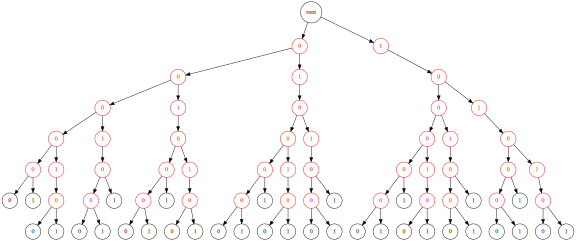

In [27]:
X = Sample(None, [0, 1], data=f_5k[10])
t = tree.ContextTree(X, max_depth=7, tree_initialization_method=gen.incremental)
#pruning = Prune(t)
#tt = CTM(t).execute(None)
df = t.df
df['active'] = 1
tt = tree.ContextTree(None, max_depth=7, source_data_frame=df[~df.node_idx.isin(df.parent_idx)])
tt.to_str()
g4l.display.draw_tree(tt, size='8, 4')
#pruning.context_tree.to_str()

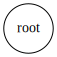

In [30]:
X = Sample(None, [0, 1], data=f_5k[0])
t = tree.ContextTree(X, max_depth=6, tree_initialization_method=gen.incremental)
print(t.to_str())
g4l.display.draw_tree(t, size='8, 4')
#pruning.context_tree.to_str()

In [31]:
filename = "/home/arthur/Documents/Neuromat/projects/SMC/arquivo/data/model1_20000.csv"
f = [x.replace(',', '') for x in open(filename).read().split('\n')]

X = Sample(None, [0, 1], data=f[10])
max_depth = 6
t = tree.ContextTree(X, max_depth=max_depth, tree_initialization_method=gen.incremental)
prune_trees = Prune(t)
prune_trees.execute()
for ti in prune_trees.context_trees:
    print(ti.to_str())

0 1
00 1 10
000 1 10 100
0000 1 10 100 1000
00000 1 10 100 1000 10000
000000 1 10 100 1000 10000 100000


In [29]:
filename = "/home/arthur/Documents/Neuromat/projects/SMC/arquivo/data/model2_10000.csv"
f = [x.replace(',', '') for x in open(filename).read().split('\n')]

X = Sample(None, [0, 1], data=f[10])
max_depth = 10
t = tree.ContextTree(X, max_depth=max_depth, tree_initialization_method=gen.incremental)
prune_trees = Prune(t)
prune_trees.execute()
for ti in prune_trees.context_trees:
    print(ti.to_str())

0 1
00 1 10
000 1 10 100
0000 1 10 100 1000
00000 1 10 100 1000 10000
000000 1 10 100 1000 10000 100000
0000000 1 10 100 1000 10000 100000 1000000
00000000 1 10 100 1000 10000 100000 1000000 10000000
000000000 1 10 100 1000 10000 100000 1000000 10000000 100000000
